## **Machine Learning Approach for Detecting Online Fraudulent Transactions**

### **Overview:**

In real-world scenarios, especially in fields like fraud detection, medical diagnosis, or fault prediction, datasets often suffer from **class imbalance**, where one class is significantly underrepresented. This imbalance can lead to biased models that favor the majority class, compromising performance on the minority class — which is often the class of interest.

This project addresses such an imbalance in a binary classification problem using a **Random Forest Classifier** and compares the performance of **resampling strategies**: Random Under-Sampling, Random Over-Sampling and SMOTE (Synthetic Minority Over-sampling Technique).

### **Objectives:**

- To identify and analyze class imbalance in the dataset.

- To apply multiple resampling techniques to address imbalance.

- To train a robust classifier using Random Forest.

- To evaluate and compare performance across different resampling methods using appropriate metrics.

- To recommend the most effective balancing strategy for imbalanced binary classification tasks.

# **Step 1: Import Required Libraries**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import re

# **Step 2: Load Dataset**

In [ ]:
# Import Google Drive to access files stored in Google Drive account
from google.colab import drive

In [ ]:
# Mount Google Drive to access the files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preview the dataset
df = pd.read_csv('/content/drive/MyDrive/Online_Fraud_Transactions_Detection/online_fraud_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Step 3: Inspect the Dataset**

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.shape

(6362620, 11)

# **Step 4: Explore Categorical Features**

In [ ]:
df['step'].unique() # Unique time steps

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
df['type'].unique() # Unique transaction types

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

# **Step 5: Encode Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'type' feature using LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Step 6: Convert Textual ID Columns to Numeric**

In [ ]:
# Extract numeric part of 'nameOrig' and 'nameDest'
df['NameOrig'] = df['nameOrig'].apply(lambda x: int(re.search(r'\d+', x).group()))
df['NameDest'] = df['nameDest'].apply(lambda x: int(re.search(r'\d+', x).group()))

# Drop original name columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# **Step 7: Confirm Dataset Structure After Preprocessing**

In [ ]:
df.head() # Preview transformed data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrig,NameDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,1231006815,1979787155
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,1666544295,2044282225
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,1305486145,553264065
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,840083671,38997010
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,2048537720,1230701703


In [ ]:
df.info() # Check final datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   NameOrig        int64  
 10  NameDest        int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


In [ ]:
df.columns # Confirm available columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'NameOrig', 'NameDest'],
      dtype='object')

# **Step 8: Feature Categorization: Numerical, Discrete and Continuous**

In [ ]:
# Extract numerical features (non-object types)
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  11


['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'NameOrig',
 'NameDest']

In [ ]:
# Identify discrete features (low unique count)
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 3


['type', 'isFraud', 'isFlaggedFraud']

In [ ]:
# Identify continuous features (exclude IDs and discrete)
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + ['NameDest', 'NameOrig', 'step']]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 5


['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

# **Step 9: Exploratory Data Analysis (EDA)**

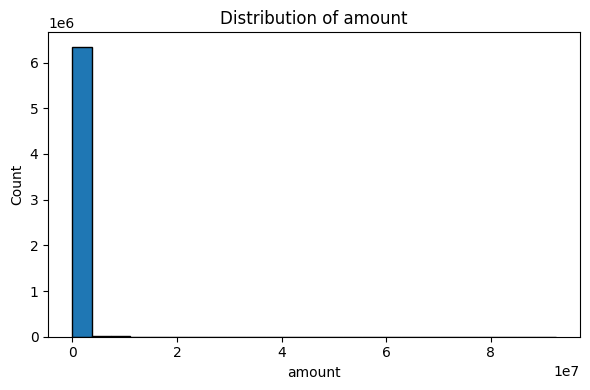

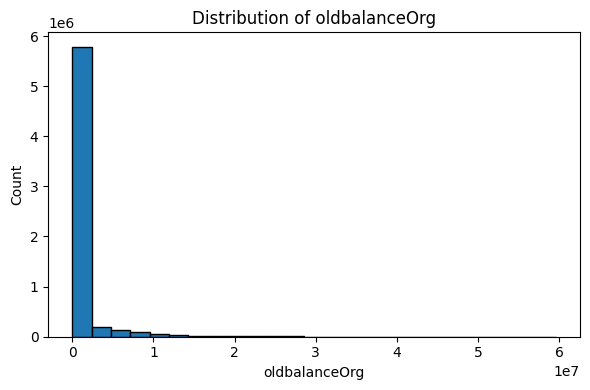

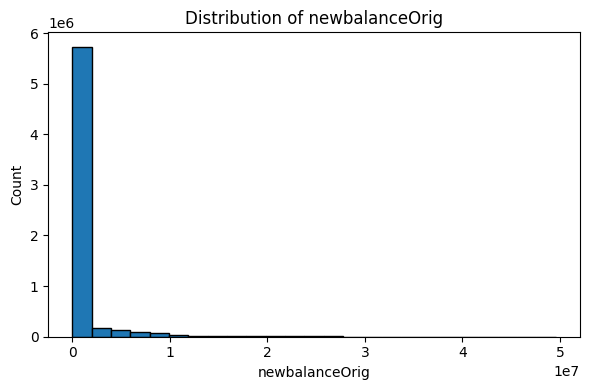

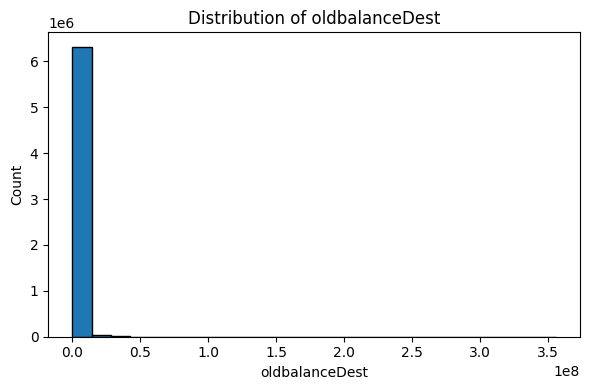

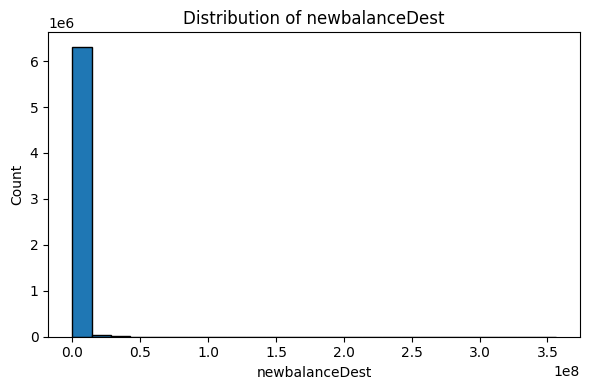

In [ ]:
# Initial histograms for all continuous features
for feature in continuous_feature:
    plt.figure(figsize=(6, 4))
    df[feature].hist(bins=25, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'Distribution of {feature}')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# **Step 10: Log Transformation to Reduce Skewness**

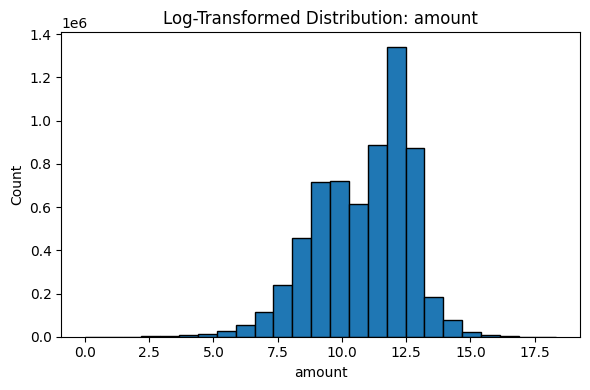

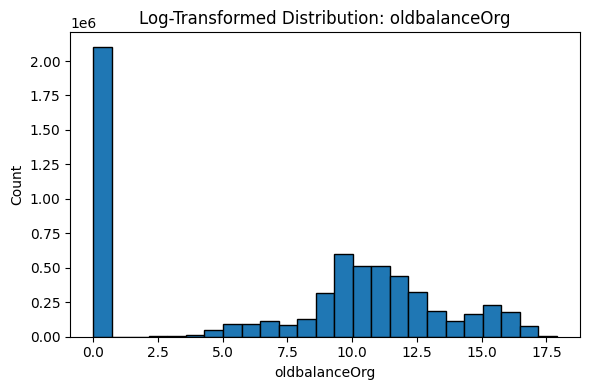

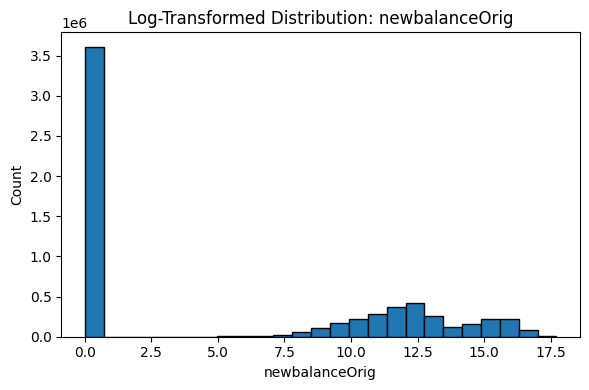

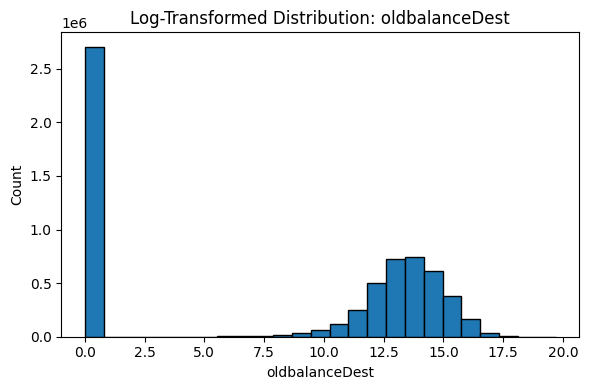

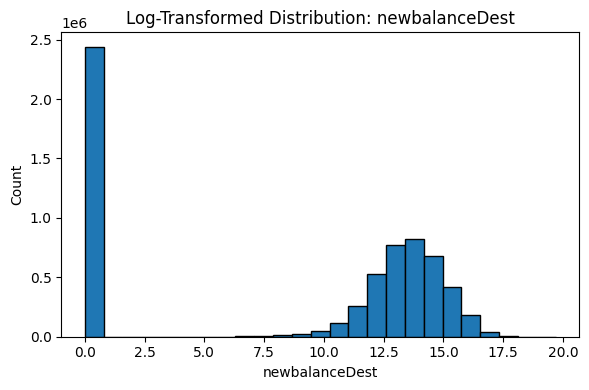

In [ ]:
# Log transform continuous features (add 1 if 0 values exist to avoid log(0))
for feature in continuous_feature:
    if 0 in df[feature].unique():
        df[feature] = np.log(df[feature] + 1)
    else:
        df[feature] = np.log(df[feature])

    plt.figure(figsize=(6, 4))
    df[feature].hist(bins=25, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'Log-Transformed Distribution: {feature}')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

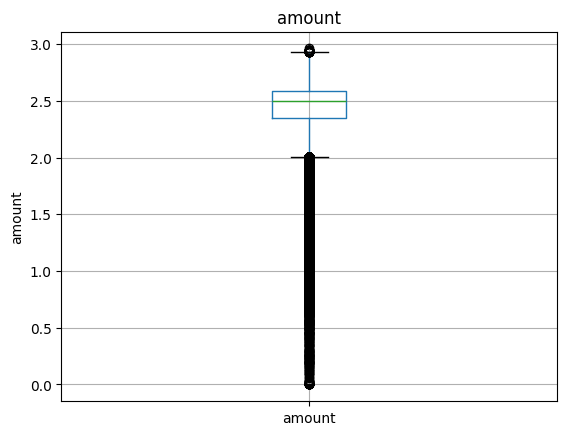

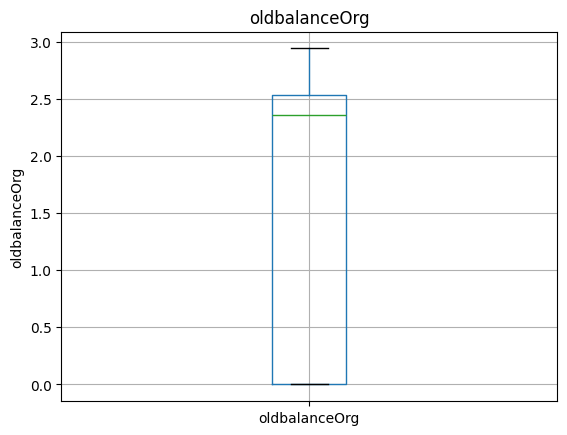

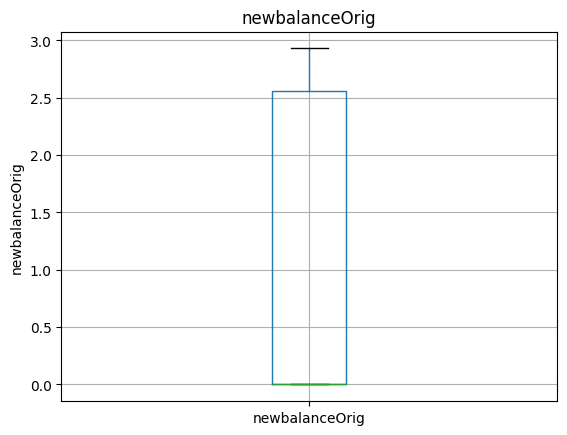

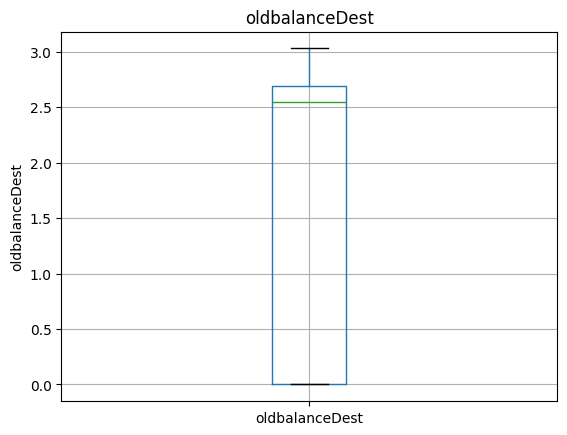

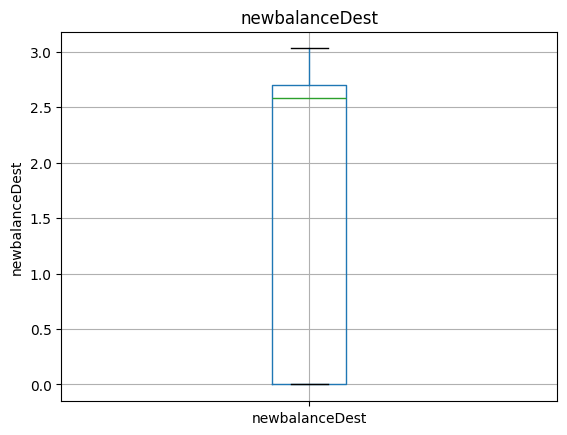

In [ ]:
for feature in continuous_feature:

    if 0 in df[feature].unique():
        df[feature]=df[feature]+1

    df[feature]=np.log(df[feature])
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# **Step 11: Boxplots for Outlier Detection**

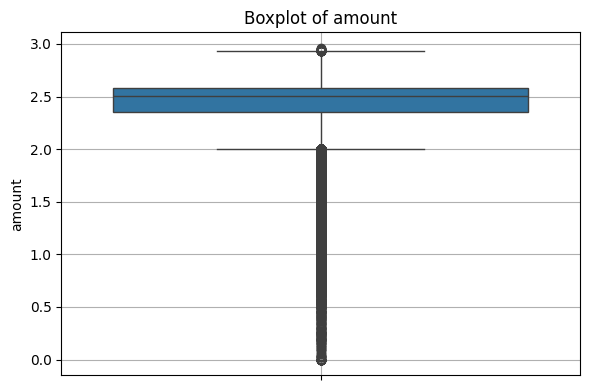

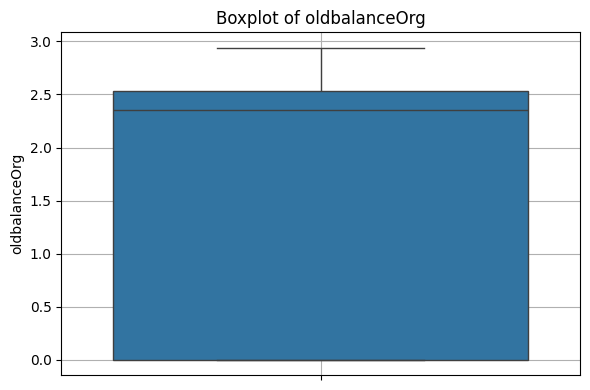

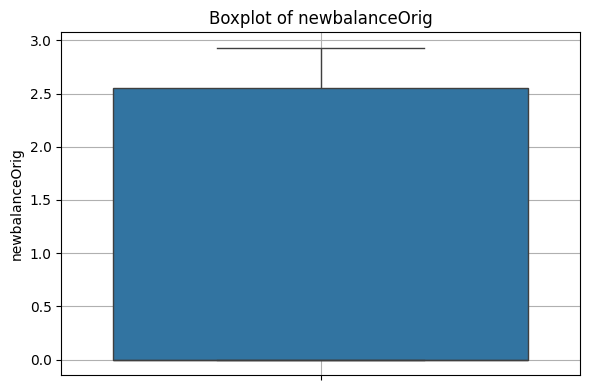

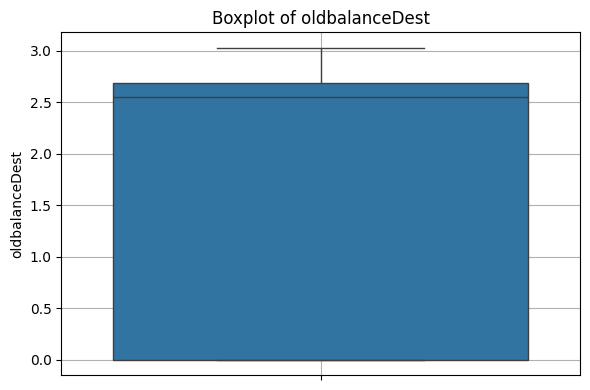

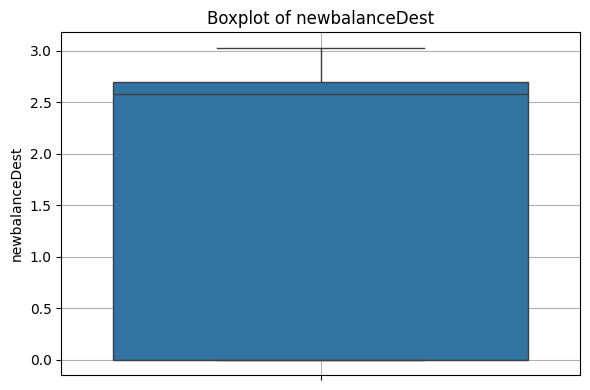

In [ ]:
for feature in continuous_feature:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrig,NameDest
0,1,3,2.321826,2.568356,2.563778,0.000000,0.0,0,0,1231006815,1979787155
1,1,3,2.143726,2.394627,2.386218,0.000000,0.0,0,0,1666544295,2044282225
2,1,4,1.825195,1.825195,0.000000,0.000000,0.0,1,0,1305486145,553264065
3,1,1,1.825195,1.825195,0.000000,2.394339,0.0,1,0,840083671,38997010
4,1,3,2.338406,2.453998,2.425261,0.000000,0.0,0,0,2048537720,1230701703


In [ ]:
df['amount'].describe()

,amount
count,6.362620e+06
mean,2.458521e+00
std,1.667155e-01
min,0.000000e+00
25%,2.351595e+00
50%,2.503364e+00
75%,2.583904e+00
max,2.962286e+00


# **Step 12: Handling Outliers (IQR Method Example for 'amount' Feature)**

<Axes: ylabel='amount'>

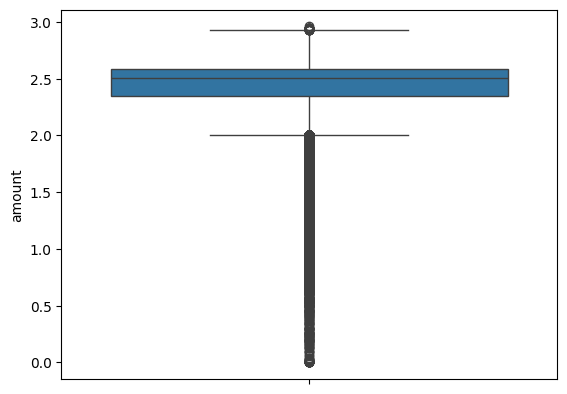

In [ ]:
sns.boxplot(df['amount'])

In [ ]:
# Finding the IQR
percentile25 = df['amount'].quantile(0.25)
percentile75 = df['amount'].quantile(0.75)

# Calculate IQR
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

# View outliers count
outliers = df[(df['amount'] < lower_limit) | (df['amount'] > upper_limit)]
print(f"Number of outliers in 'amount': {outliers.shape[0]}")

Lower limit: 2.003131097748742
Upper limit: 2.9323677777563883
Number of outliers in 'amount': 86491


# **Step 13: More Data Visualizations**

**Correlation Heatmap**

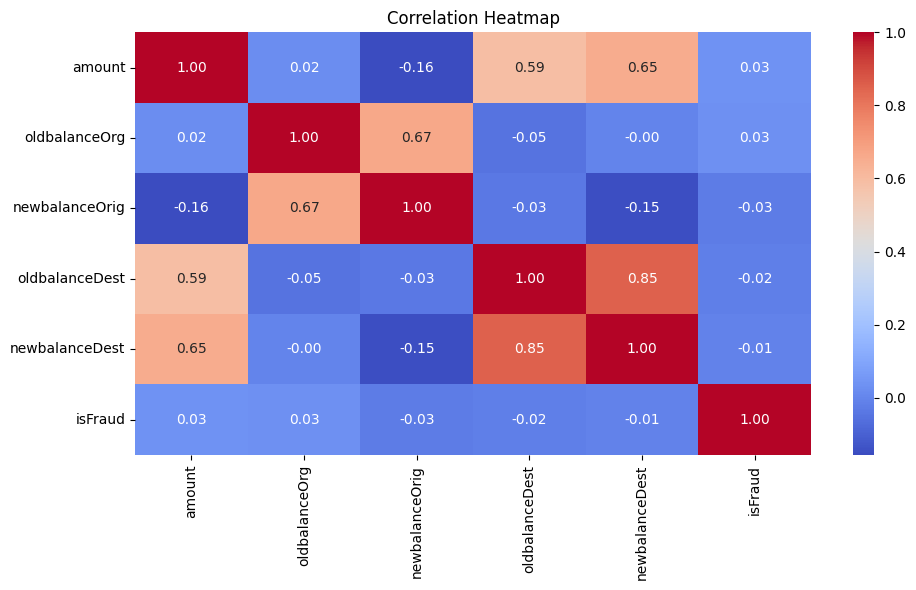

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous_feature + ['isFraud']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**KDE Plot for 'amount' by Class**

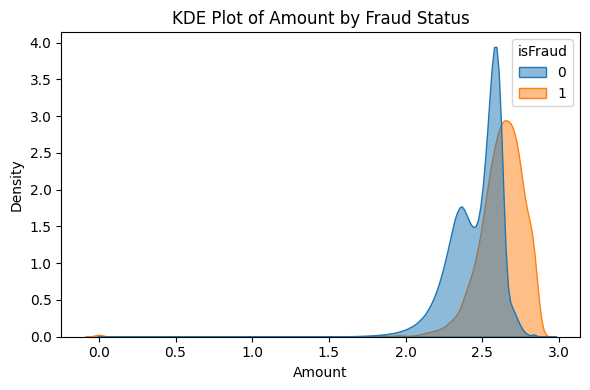

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='amount', hue='isFraud', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Amount by Fraud Status')
plt.xlabel('Amount')
plt.tight_layout()
plt.show()

**Pairplot**

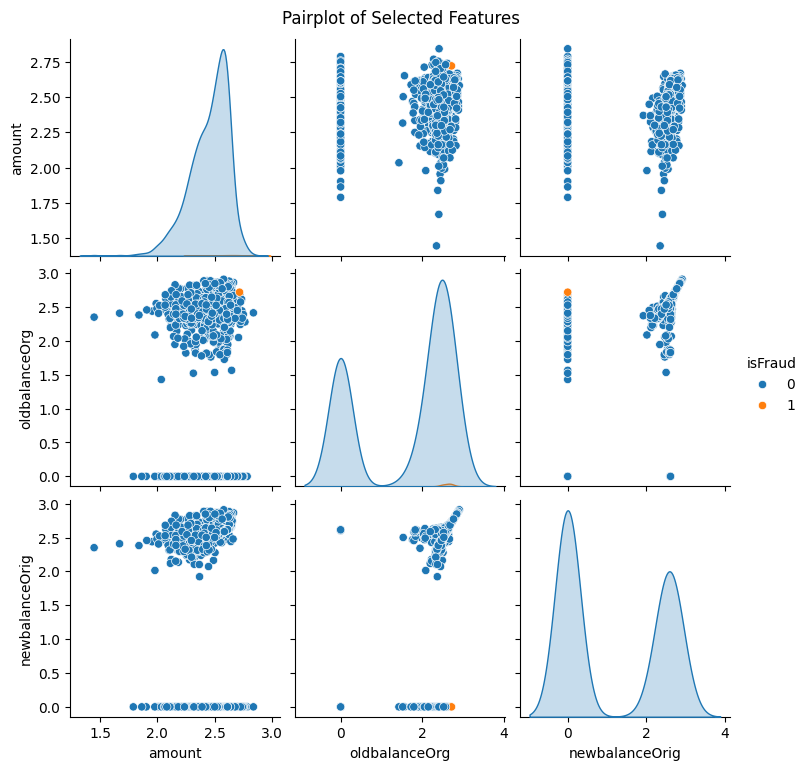

In [ ]:
subset = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']].sample(1000, random_state=1)
sns.pairplot(subset, hue='isFraud')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# **Step 14: Outlier Handling – Trimming Method**

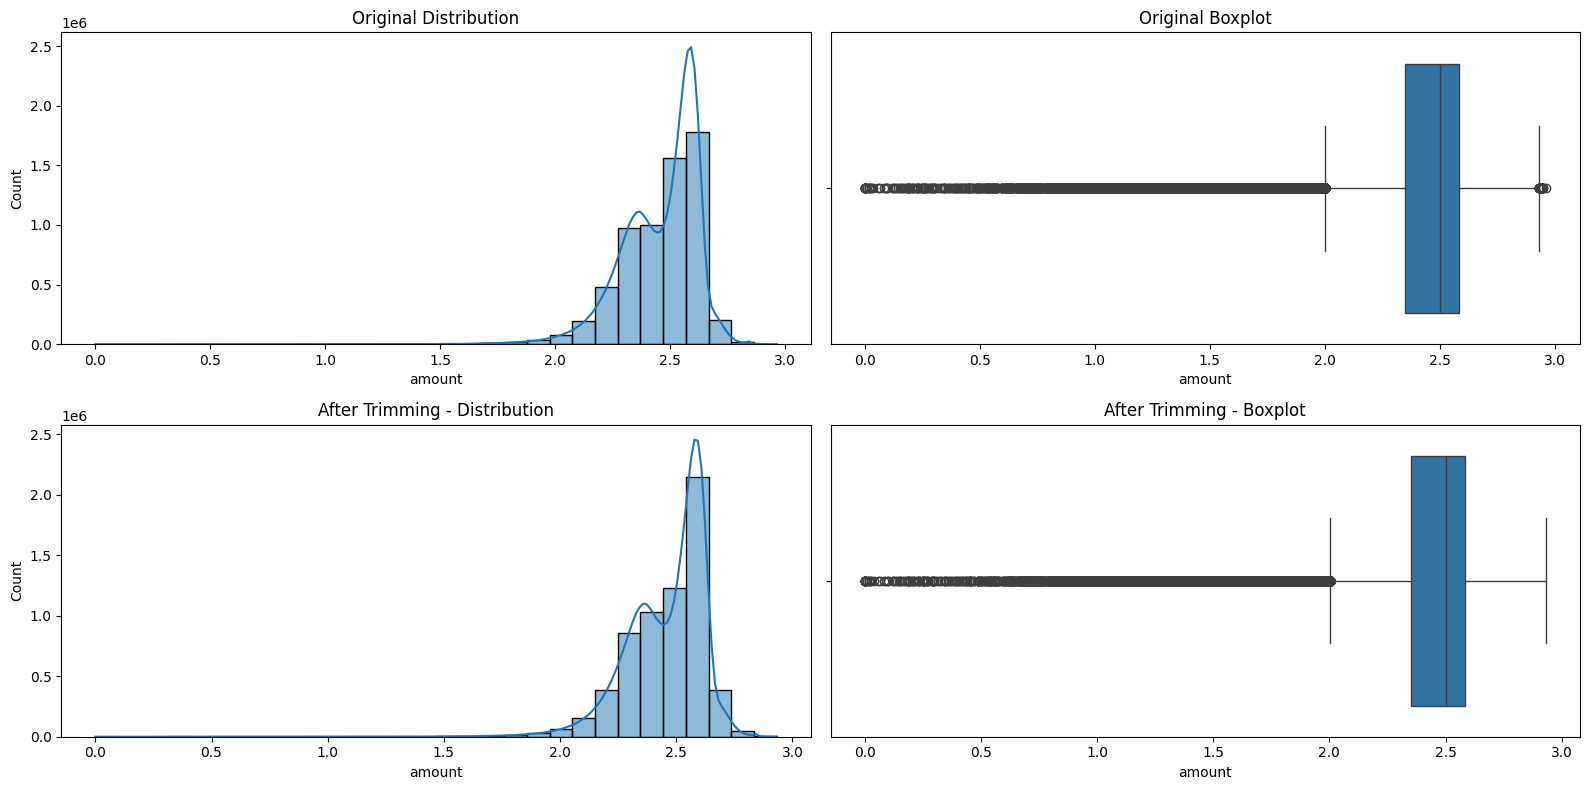

In [ ]:
# Trimming outliers above the upper limit in 'amount'
new_df = df[df['amount'] < upper_limit]

# Visual Comparison (Before vs After Trimming)
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['amount'], kde=True, bins=30)
plt.title('Original Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['amount'])
plt.title('Original Boxplot')

plt.subplot(2, 2, 3)
sns.histplot(new_df['amount'], kde=True, bins=30)
plt.title('After Trimming - Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df['amount'])
plt.title('After Trimming - Boxplot')

plt.tight_layout()
plt.show()

# **Step 15: Outlier Handling – Capping Method (Winsorizing)**

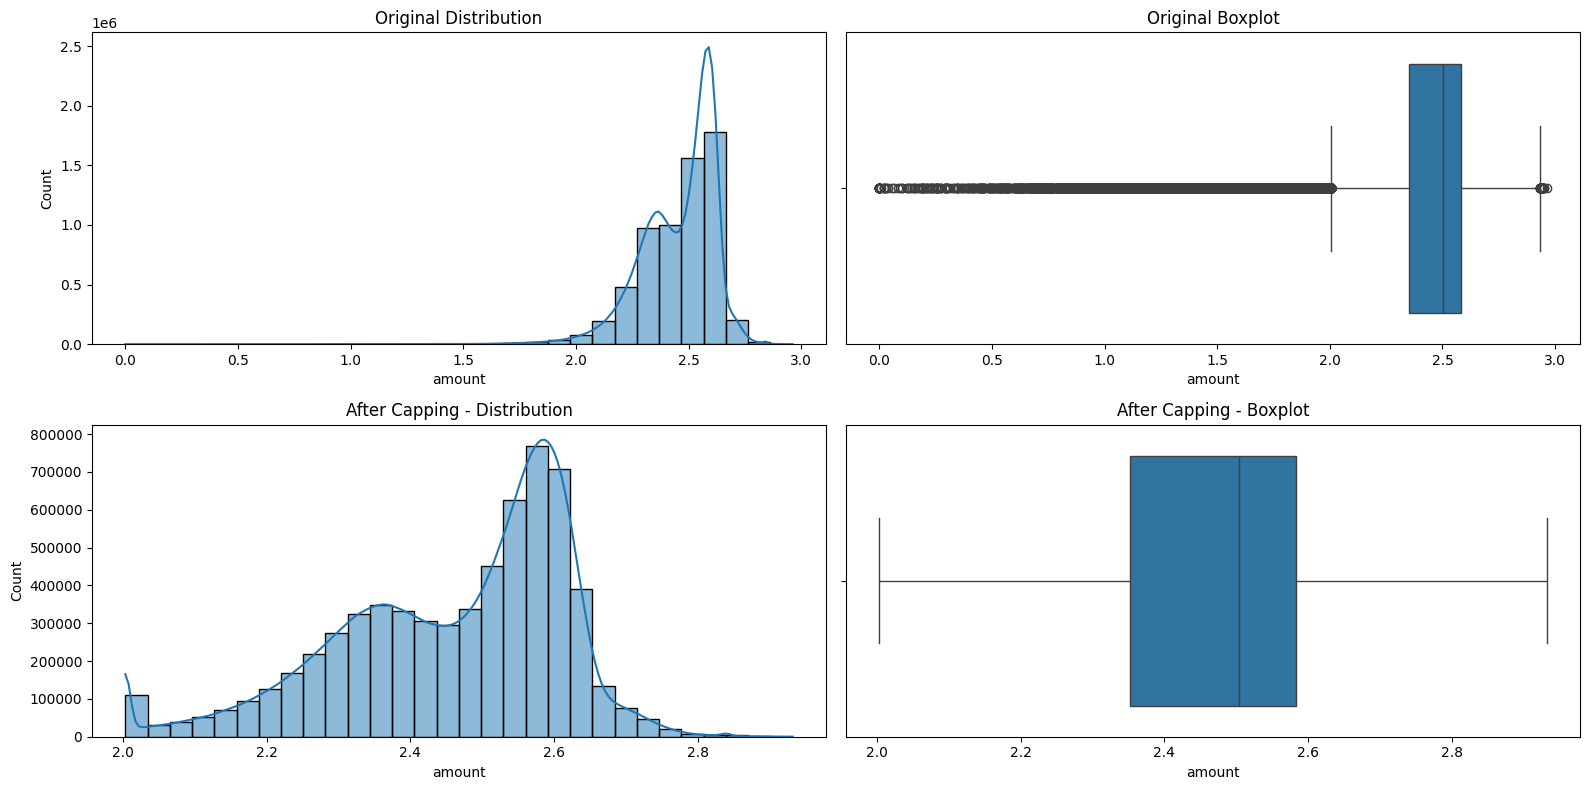

In [ ]:
# Capping outliers at IQR limits
new_df_cap = df.copy()
new_df_cap['amount'] = np.where(
    new_df_cap['amount'] > upper_limit, upper_limit,
    np.where(new_df_cap['amount'] < lower_limit, lower_limit, new_df_cap['amount'])
)

# Visual Comparison (Before vs After Capping)
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['amount'], kde=True, bins=30)
plt.title('Original Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['amount'])
plt.title('Original Boxplot')

plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['amount'], kde=True, bins=30)
plt.title('After Capping - Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_cap['amount'])
plt.title('After Capping - Boxplot')

plt.tight_layout()
plt.show()

# **Step 16: Use Capped Data for Model Building**

In [ ]:
# Using the capped dataset
data = new_df_cap.copy()

In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrig,NameDest
0,1,3,2.321826,2.568356,2.563778,0.000000,0.0,0,0,1231006815,1979787155
1,1,3,2.143726,2.394627,2.386218,0.000000,0.0,0,0,1666544295,2044282225
2,1,4,2.003131,1.825195,0.000000,0.000000,0.0,1,0,1305486145,553264065
3,1,1,2.003131,1.825195,0.000000,2.394339,0.0,1,0,840083671,38997010
4,1,3,2.338406,2.453998,2.425261,0.000000,0.0,0,0,2048537720,1230701703


In [ ]:
# Check fraud class distribution
print(data['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [ ]:
# Remove any potential NaNs
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0
NameOrig,0


In [ ]:
# Split into features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = rf.predict(X_test)

print("Random Forest Classifier Performance:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")

Random Forest Classifier Performance:
Accuracy : 0.9997
Precision: 0.9801
Recall   : 0.7692
F1-score : 0.8619


# **Step 17: Random Under-Sampling Method**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Apply under-sampling (50% ratio)
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print("Under-sampled class distribution:", Counter(y_train_under))

Under-sampled class distribution: Counter({0: 11556, 1: 5778})


In [ ]:
# Train and evaluate
rf.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("\n Under-sampling Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


 Under-sampling Performance:
Accuracy : 0.9903147864663718
Precision: 0.11576024511681349
Recall   : 0.9930184804928132
F1-score : 0.20734896882905288


# **Step 18: Random Over-Sampling Method**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply over-sampling (50% ratio)
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("Over-sampled class distribution:", Counter(y_train_over))

Over-sampled class distribution: Counter({0: 4448056, 1: 2224028})


In [ ]:
# Train and evaluate
rf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("\n Over-sampling Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


 Over-sampling Performance:
Accuracy : 0.9997076675960532
Precision: 0.9625431246919665
Recall   : 0.8020533880903491
F1-score : 0.875


# **Step 19: SMOTE (Synthetic Minority Over-sampling Technique)**

In [ ]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE (50% ratio)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("SMOTE-sampled class distribution:", Counter(y_train_smote))

SMOTE-sampled class distribution: Counter({0: 4448056, 1: 2224028})


In [ ]:
# Train and evaluate
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("\n SMOTE Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


 SMOTE Performance:
Accuracy : 0.9991953000493508
Precision: 0.6193257233873108
Recall   : 0.9581108829568789
F1-score : 0.7523379554982264


# **Observations:**

1. Random Forest Classifier (Original Imbalanced Data):

  - Excellent accuracy (99.97%) and precision (98%).

  - Recall (76.9%) is relatively lower, meaning it misses some frauds.

  - Balanced F1-score (86%), suggesting good performance but room for improvement in identifying all frauds.

2. Under-sampling:

  - Very high recall (99.3%), which means most frauds are detected.

  - Extremely low precision (11.6%), leading to many false positives.

  - Low F1-score (20.7%), indicating an imbalanced trade-off between precision and recall.

3. Over-sampling:

  - High accuracy (99.97%) and precision (96.2%).

  - Better recall (80.2%) than the base model.

  - F1-score (87.5%) is highest among all techniques, indicating a well-balanced model.

4. SMOTE:

  - Good recall (95.8%), indicating most frauds are detected.

  - Moderate precision (61.9%), showing more false positives than oversampling.

  - F1-score (75.2%), lower than oversampling but better than undersampling.

# **Conclusion:**

The dataset is **highly imbalanced**, and using the original distribution favors precision but sacrifices recall.

**Under-sampling** achieves high recall but at the cost of too many false positives, making it less practical.

**Over-sampling** provides the best trade-off with high precision and recall, resulting in the **highest F1-score**, making it the most effective strategy for this dataset.

**SMOTE** performs better than under-sampling and can be considered a viable option if a higher recall is desired over precision.